In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

[]


**Importing all libraries required for Anova test**

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest
from scipy.stats import shapiro
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.sandbox.stats.multicomp import TukeyHSDResults
from statsmodels.graphics.factorplots import interaction_plot
from pandas.plotting import scatter_matrix

**Loading Dataset**

In [3]:
iris=load_iris()

In [4]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
dataframe_iris=pd.DataFrame(iris.data,columns=['sepalLength','sepalWidth','petalLength','petalWidth'])

In [6]:
dataframe_iris.shape

(150, 4)

In [7]:
dataframe_iris1=pd.DataFrame(iris.target,columns=['target'])

In [8]:
dataframe_iris1.shape

(150, 1)

**Iris Data Visualization**

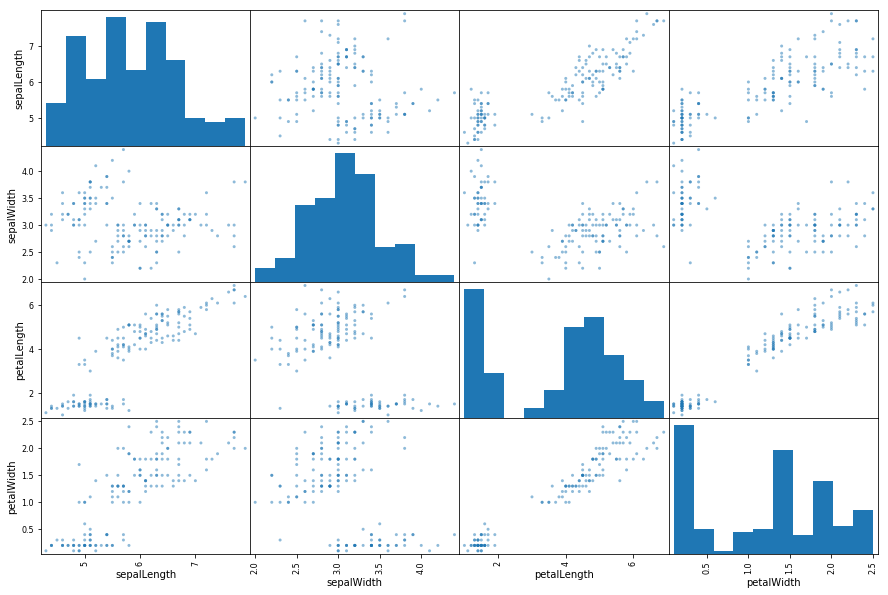

In [9]:
scatter_matrix(dataframe_iris[['sepalLength', 'sepalWidth', 'petalLength','petalWidth']],figsize=(15,10))  
plt.show()

In [10]:
ID=[]
for i in range(0,150):
    ID.append(i)

In [11]:
dataframe=pd.DataFrame(ID,columns=['ID'])

In [12]:
dataframe_iris_new=pd.concat([dataframe_iris,dataframe_iris1,dataframe],axis=1)

In [13]:
dataframe_iris_new.columns

Index(['sepalLength', 'sepalWidth', 'petalLength', 'petalWidth', 'target',
       'ID'],
      dtype='object')

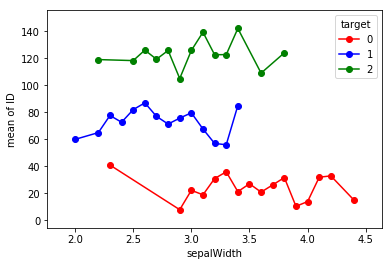

In [14]:
fig = interaction_plot(dataframe_iris_new.sepalWidth,dataframe_iris_new.target,
                       dataframe_iris_new.ID,colors=['red','blue','green'], ms=12)

In [15]:
dataframe_iris_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
sepalLength    150 non-null float64
sepalWidth     150 non-null float64
petalLength    150 non-null float64
petalWidth     150 non-null float64
target         150 non-null int64
ID             150 non-null int64
dtypes: float64(4), int64(2)
memory usage: 7.1 KB


In [16]:
dataframe_iris_new.describe()

,sepalLength,sepalWidth,petalLength,petalWidth,target,ID
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000,74.500000
std,0.828066,0.435866,1.765298,0.762238,0.819232,43.445368
min,4.300000,2.000000,1.000000,0.100000,0.000000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000,37.250000
50%,5.800000,3.000000,4.350000,1.300000,1.000000,74.500000
75%,6.400000,3.300000,5.100000,1.800000,2.000000,111.750000
max,7.900000,4.400000,6.900000,2.500000,2.000000,149.000000


**Anova test:
Analysis of variance(anova) is a statistical technique that is used to check if means of two or more groups are statistically different from each other.
Consider a group of three samples means for sepal_width_cm from the iris dataset.
Our goal is to determine that each group's mean value are statistically different from the other's and to do this we need to evaluate the variability between each of the mean values**

In [17]:
##############################################

**Anova hypothesis**

**To implement Anova test we have to create null hypothesis and alternate hypothesis**

**Null hypothesis=sample means are equal**

**Alternate hypothesis=sample means are not equal**

In [18]:
##############################################

In [19]:
print(dataframe_iris_new['sepalWidth'].groupby(dataframe_iris_new['target']).mean())

target
0    3.428
1    2.770
2    2.974
Name: sepalWidth, dtype: float64


In [20]:
dataframe_iris_new.mean()

sepalLength     5.843333
sepalWidth      3.057333
petalLength     3.758000
petalWidth      1.199333
target          1.000000
ID             74.500000
dtype: float64

**But Anova also analyze variance of differnt groups and evaluate whether we have to reject 
The null hypothesis and accept alternate hypothesis
For that Anova calculate f-value and p-value. 
P-value:-p-value is used to evaluate hypothesis results.P-value is a number between 0 and 1.
If p-value<0.05 we have to reject null hypothesis
And p-value>0.05 we have to accept null hypothesis.
F-value:-f-value is the ratio of variance between groups and variance within groups.
If f-value is close to 1 then we say that our null hypothesis is true i.e samples have equal mean and
F-value is greater than 1 then samples have quite different mean values.**

**Before performing anova test Anova assumes following points. 
Anova assumptions:
1.Normality:-samples are taken from normal distribution.
To check whether data is normally distributed or not Anova use shapiro-wilks test
2.Each sample is independent of other sample.
3.Variance:- variance should be same.
To check whether variance between groups are equal Anova use levene/barlett test.**

In [21]:
##############################################

**Check normal distribution of data(shapiro-wilk test)
Null hypothesis:- data is drawn from normal distribution
Alternate hypothesis:- data is not drawn from normal distribution**

In [22]:
stats.shapiro(dataframe_iris_new['sepalWidth'][dataframe_iris_new['target']])

(0.7824662327766418, 1.1907719276761652e-13)

**Interpretation:-As p-value is significant we reject null hypothesis.**

In [23]:
##############################################

**Check equality of variance between groups(levene/bartlett test)**

In [24]:
p_value=stats.levene(dataframe_iris_new['sepalWidth'],dataframe_iris_new['target'])

In [25]:
p_value

LeveneResult(statistic=55.1738582824089, pvalue=1.1695737027924642e-12)

**Interpretation:- As p-value is significant we reject null hypothesis**

In [26]:
##############################################

**Types of Anova:**
**One-way Anova:-one way Anova is used to compare means of two or more samples using f-value and p-value.
Two-way Anova:-in two way Anova, data are classified on the basis of two factors.
Difference between one-way Anova and two-way Anova.
One way anova compares three or more than three categorical gropus ,compare their means and to evaluate whether there is difference between them.
Hypothesis of one way-anova:
Null hypothesis(h0):-null hypothesis is that all groups of mean are equal,there is no difference between them.
Alternate hypothesis(h1):-alternate hypothesis states that there is difference between mean.
Two-way Anova compares means of three or more groups of data, where two independent variables are considered.
The hypothesis of two way Anova is same as one-way Anova.**

**Example:-we took iris dataset for Anova testing.Here, we have only one independent variable i.e. Species(iris-setosa,iris-versicolor,iris-virginica) which are in categorical and we took sepal width as a continous variable. For exmaple, if someone wants looked at sepal width in iris-setosa,iris-versicolor and iris virginica,there would be three species analyzed and therfore three groups to the analysis.
In iris dataset we have only one independent variable i.e. Species so we are doing one-way Anova testing.**

In [27]:
##############################################

In [28]:
F_value,P_value=stats.f_oneway(dataframe_iris_new['sepalWidth'],dataframe_iris_new['target'])

In [29]:
print("F_value=",F_value,",","P_value=",P_value)

F_value= 737.2872570149498 , P_value= 1.418242288711535e-82


In [30]:
if F_value>1.0:
    print("******SAMPLES HAVE DIFFERENT MEAN******")
else:
    print("******SAMPLES HAVE EQUAL MEAN******")

******SAMPLES HAVE DIFFERENT MEAN******


**Looking at f-value, we say that samples have different mean therefore we conclude that samples have different mean**

In [31]:
if P_value<0.05:
    print("******REJECT NULL HYPOTHESIS******")
else:
    print("******ACCEPT NULL HYPOTHESIS******")

******REJECT NULL HYPOTHESIS******


**As p-value obtained from one way Anova analysis states that there is significant difference between samples mean.**

In [32]:
##############################################

**There are different post-hoc test to verify results.
1.Lsd test.
2.Tukey's hsd test
3.Scheffe's test
Here we are going to perform tukey's hsd test to evaluate our hypothesis.
To know pairs of significant different groups.Tukey hsd perform multiple pairwise comparions between groups.**

In [33]:
tukey = pairwise_tukeyhsd(endog=dataframe_iris_new['sepalWidth'], groups=dataframe_iris_new['target'], alpha=0.05)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   -0.658  0.001 -0.8189 -0.4971   True
     0      2   -0.454  0.001 -0.6149 -0.2931   True
     1      2    0.204 0.0088  0.0431  0.3649   True
----------------------------------------------------


**Interpretation:-Above tukey results show that all pairwise comparison for different groups rejects null hypothesis and indicates statistical significant difference.**

In [34]:
##############################################

**CONCLUSION:-as p-value obtained from Anova test and different test states that we have to reject null hypothesis.
And accept alternate hypothesis that atleast two groups means are statistically different from each other.**